In [43]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  # Importing this module for 3D plot

%matplotlib inline

# Feedback:

## Data:
- Try to explain what the "player rating" means, so either find a formula for it or explain where it is found
## Model
- Player rating seems to have a lot of influence on the value in the model, so maybe try and train a model that doesn't use player rating at all to be a comparison.

# Data Visualization
## Distributions
- Age
- Player Rating
- Position
## Plotting Graphs
- Y-axis: Market Value
- X-axis:
    - Player Rating
    - Age
    - Wages
    - Position

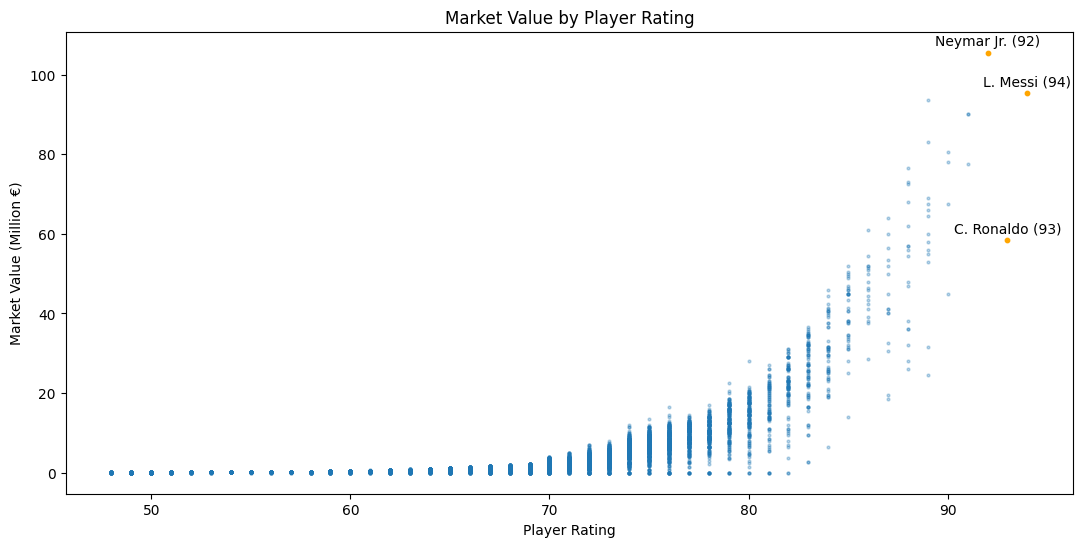

In [44]:
# Load data from CSV file
data = np.loadtxt('players_20.csv', delimiter=',', skiprows=1, usecols=(4, 10, 12, 13))

# Extract relevant columns
age = data[:, 0]
rating = data[:, 1]
market_value = data[:, 2] / 1000000  # Convert market value to million euros
wages = data[:, 3] / 1000 # Convert wage value to thousand euros

# Plot scatter plot
plt.figure(figsize=(13, 6))
plt.scatter(rating, market_value, s=4, alpha=0.3)
plt.xlabel('Player Rating')
plt.ylabel('Market Value (Million €)')

# Find indices of top 3 players with highest market value
top3_indices = np.argsort(rating)[-3:]
top3_players = ['L. Messi', 'C. Ronaldo', 'Neymar Jr.']

# Highlight top 3 players
plt.scatter(rating[top3_indices], market_value[top3_indices], color='orange', s=10)
for i in top3_indices:
    plt.annotate(f"{top3_players[i]} ({int(data[i,1])})", (rating[i], market_value[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Market Value by Player Rating')
plt.show()

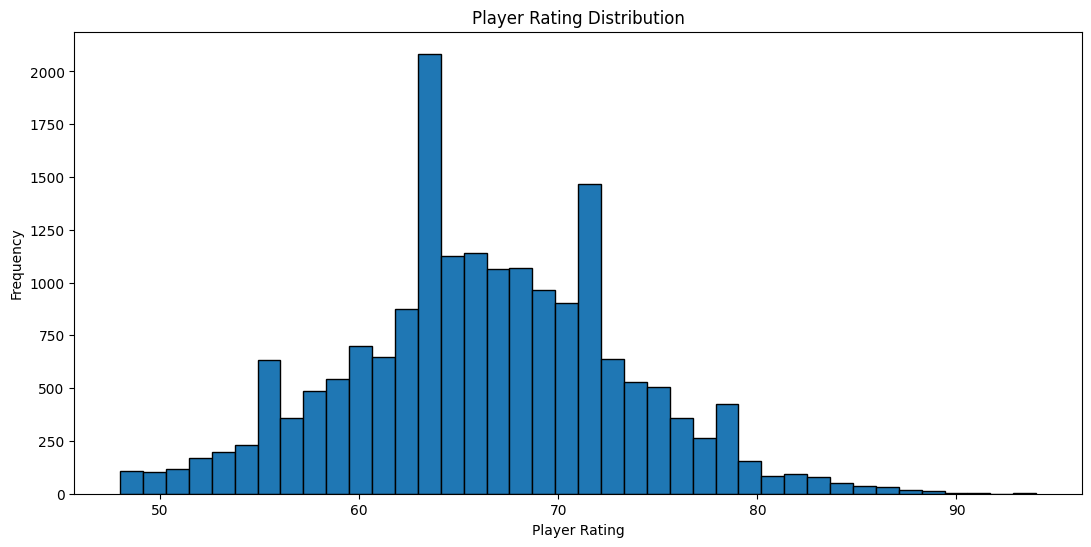

In [45]:
# Player Rating Distribution
plt.figure(figsize=(13, 6))
plt.hist(rating, bins=40, edgecolor='black')
plt.xlabel('Player Rating')
plt.ylabel('Frequency')
plt.title('Player Rating Distribution')
plt.show()

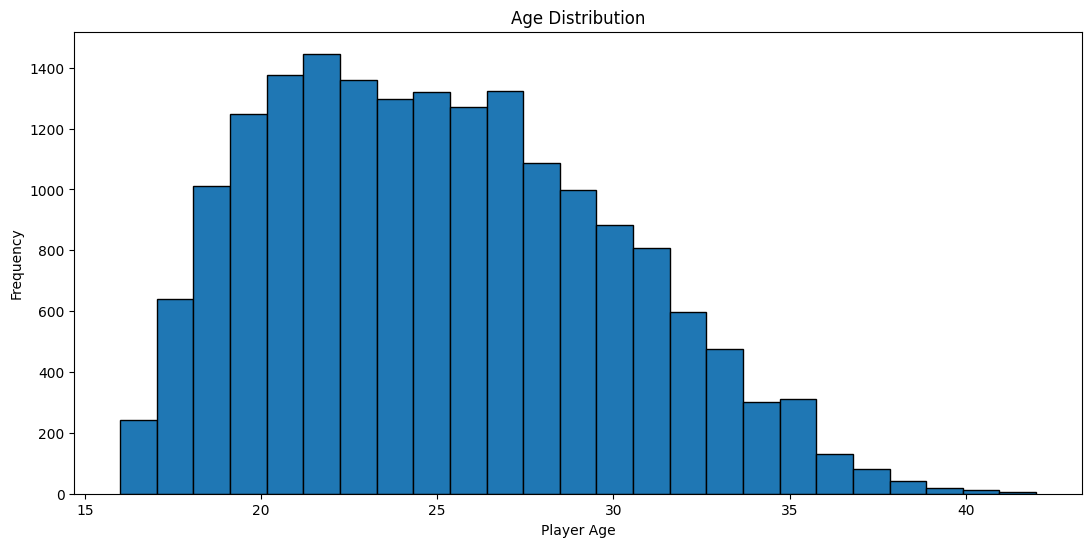

In [46]:
# Age Distribution
plt.figure(figsize=(13, 6))
plt.hist(data[:,0], bins=25, edgecolor='black')
plt.xlabel('Player Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

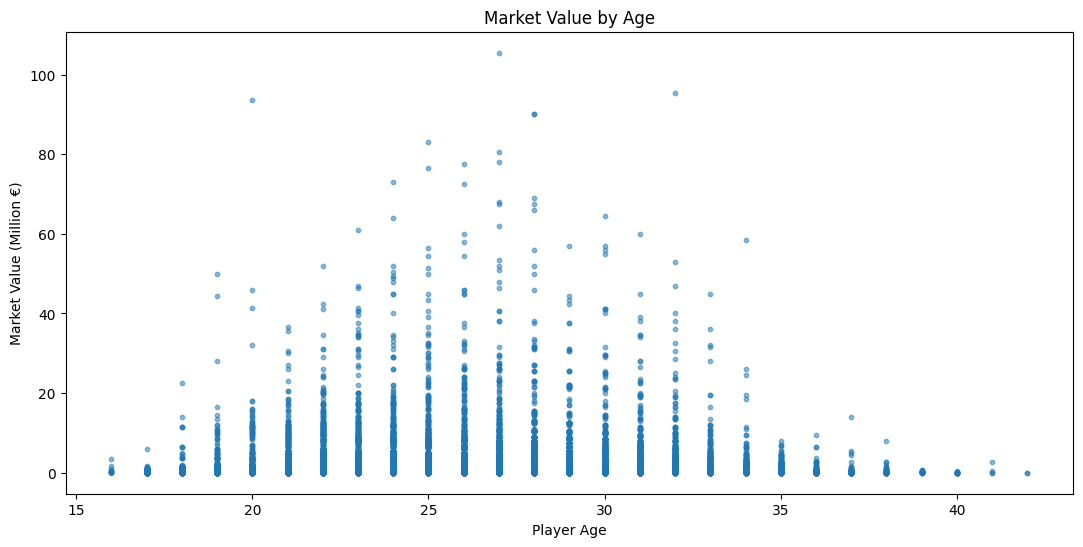

In [47]:
# Market Value by Age
plt.figure(figsize=(13, 6))
plt.scatter(age, market_value, s=10, alpha=0.5)
plt.xlabel('Player Age')
plt.ylabel('Market Value (Million €)')
plt.title('Market Value by Age');

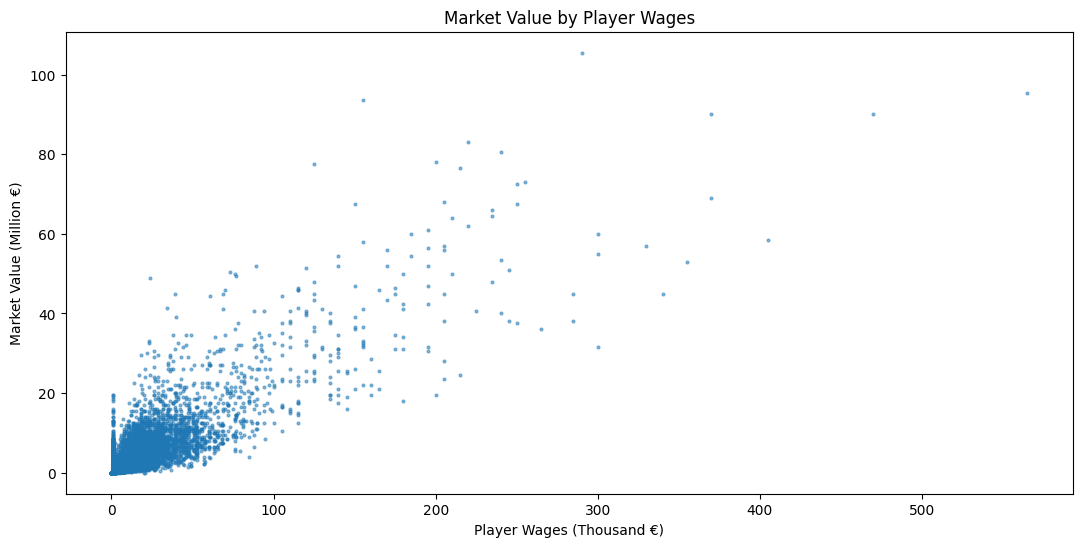

In [48]:
plt.figure(figsize=(13, 6))
plt.scatter(wages, market_value, s=4, alpha=0.5)
plt.xlabel('Player Wages (Thousand €)')
plt.ylabel('Market Value (Million €)')
plt.title('Market Value by Player Wages');

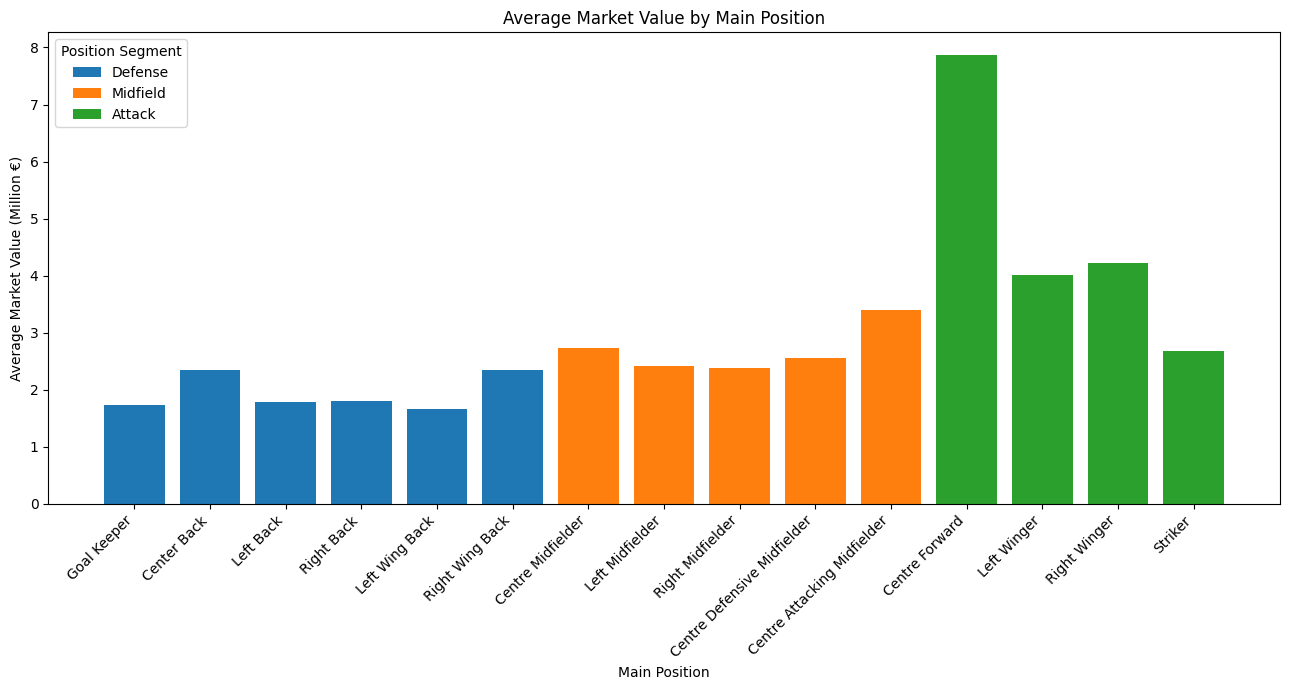

In [49]:
# Dictionary containing main positions and their corresponding labels
positions = {'GK': 'Goal Keeper', 
             'CB': 'Center Back',
             'RB': 'Right Back',
             'LB': 'Left Back',
             'LWB': 'Left Wing Back',
             'RWB': 'Right Wing Back',
             'CM': 'Centre Midfielder',
             'LM': 'Left Midfielder',
             'RM': 'Right Midfielder',
             'LW': 'Left Winger',
             'RW': 'Right Winger',
             'CDM': 'Centre Defensive Midfielder',
             'CAM': 'Centre Attacking Midfielder',
             'CF': 'Centre Forward',
             'ST': 'Striker'}

# Load data from CSV file
position_data = pd.read_csv('players_20.csv')

# Extract main position from the list
position_data['main_position'] = position_data['player_positions'].apply(lambda x: x.split(',')[0])

# Group positions into segments
defense_positions = ['GK', 'CB', 'LB', 'RB', 'LWB', 'RWB']
midfield_positions = ['CM', 'LM', 'RM', 'CDM', 'CAM']
attack_positions = ['CF', 'LW', 'RW', 'ST']

# Group data by main positions and calculate average market value for each position
avg_market_values = position_data.groupby('main_position')['value_eur'].mean() / 1000000  # Scale for visualization

# Create bar chart
plt.figure(figsize=(13, 7))

# Plot segments separately
for segment_positions in [defense_positions, midfield_positions, attack_positions]:
    segment_avg_values = avg_market_values[segment_positions]
    segment_labels = [positions[position] for position in segment_positions]
    plt.bar(segment_labels, segment_avg_values, label=', '.join(segment_positions))

plt.title('Average Market Value by Main Position')
plt.xlabel('Main Position')
plt.ylabel('Average Market Value (Million €)')
plt.legend(['Defense', 'Midfield', 'Attack'], title='Position Segment', loc = 'upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

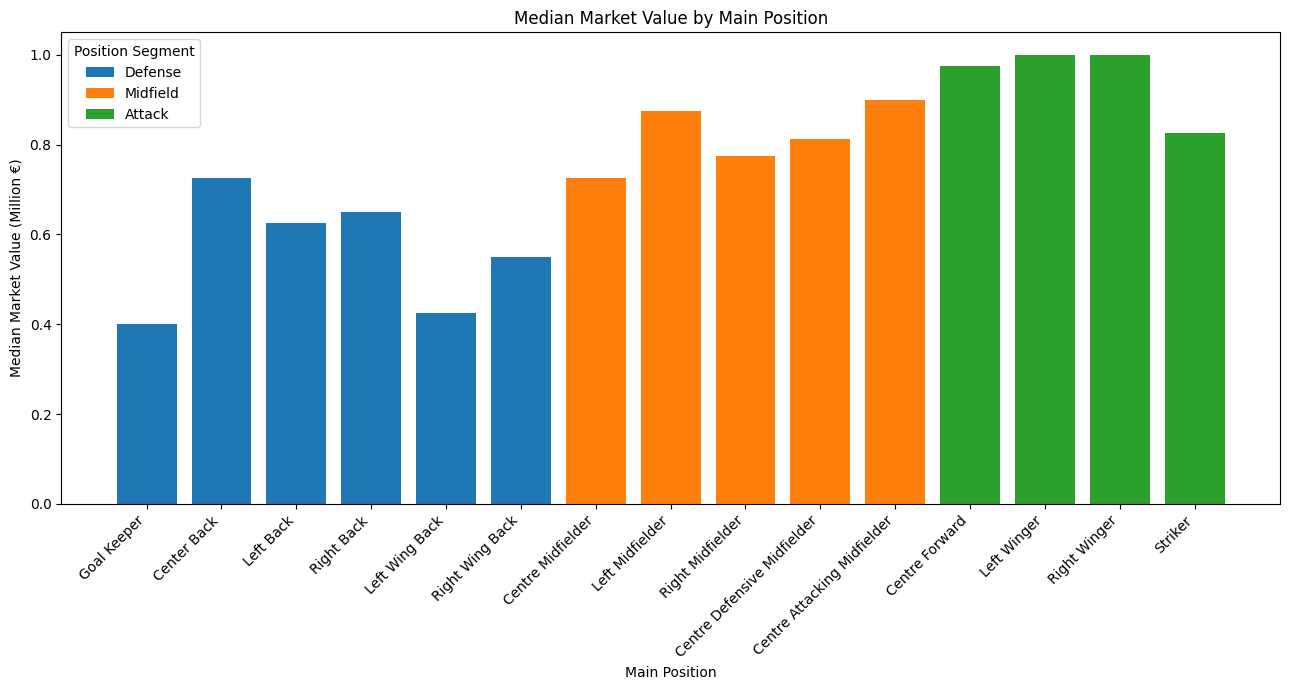

In [50]:
# Group data by main positions and calculate average market value for each position
median_market_values = position_data.groupby('main_position')['value_eur'].median() / 1000000  # Scale for visualization

# Create bar chart
plt.figure(figsize=(13, 7))

# Plot segments separately
for segment_positions in [defense_positions, midfield_positions, attack_positions]:
    segment_median_values = median_market_values[segment_positions]
    segment_labels = [positions[position] for position in segment_positions]
    plt.bar(segment_labels, segment_median_values, label=', '.join(segment_positions))

plt.title('Median Market Value by Main Position')
plt.xlabel('Main Position')
plt.ylabel('Median Market Value (Million €)')
plt.legend(['Defense', 'Midfield', 'Attack'], title='Position Segment', loc = 'upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

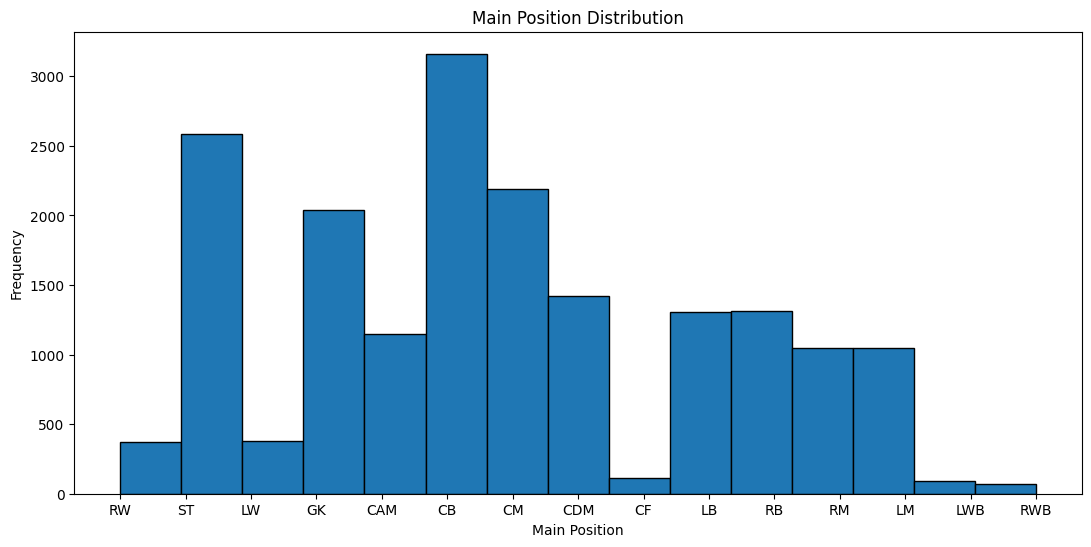

In [51]:
# Main Position Distribution
plt.figure(figsize=(13, 6))
plt.hist(position_data['main_position'], bins=15, edgecolor='black')
plt.xlabel('Main Position')
plt.ylabel('Frequency')
plt.title('Main Position Distribution')
plt.show()

## Model Selection
# 1. Single feature regression

In [82]:
x = rating.reshape(-1, 1)
y = market_value
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [83]:
linear = LinearRegression()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor(10)

linear.fit(x_train, y_train)
tree.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

MSE linear: 17.010925047352686
MSE tree: 3.7069794188950222
MSE knn: 3.1568882246687333


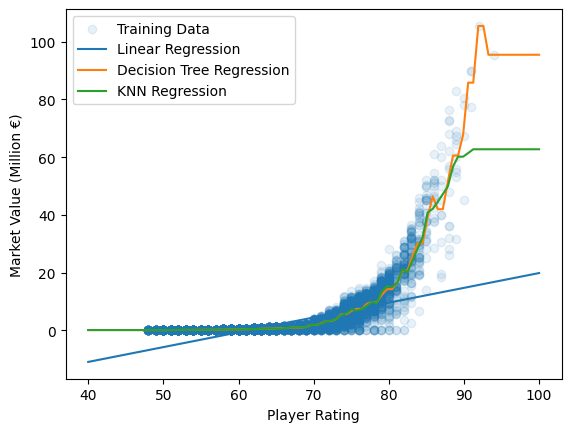

In [98]:
# Plot training data and model predictions
plt.scatter(x_train[:, 0], y_train, alpha=0.1, label='Training Data')
x_lin = np.linspace(40, 100, 90).reshape(-1, 1)
plt.plot(x_lin, linear.predict(x_lin), label='Linear Regression')
plt.plot(x_lin, tree.predict(x_lin), label='Decision Tree Regression')
plt.plot(x_lin, knn.predict(x_lin), label='KNN Regression')
# plt.plot(x_lin, linear.predict(np.hstack((np.ones_like(x_lin), x_lin))), label='Linear Regression')
# plt.plot(x_lin, tree.predict(np.hstack((np.ones_like(x_lin), x_lin))), label='Decision Tree Regression')
# plt.plot(x_lin, knn.predict(np.hstack((np.ones_like(x_lin), x_lin))), label='KNN Regression')
plt.xlabel('Player Rating')
plt.ylabel('Market Value (Million €)')
plt.legend()

# Evaluate models
print('MSE linear:', mean_squared_error(y_test, linear.predict(x_test)))
print('MSE tree:', mean_squared_error(y_test, tree.predict(x_test)))
print('MSE knn:', mean_squared_error(y_test, knn.predict(x_test)))

plt.show()

# Hyperparameter Tuning
## Choosing k for kNN

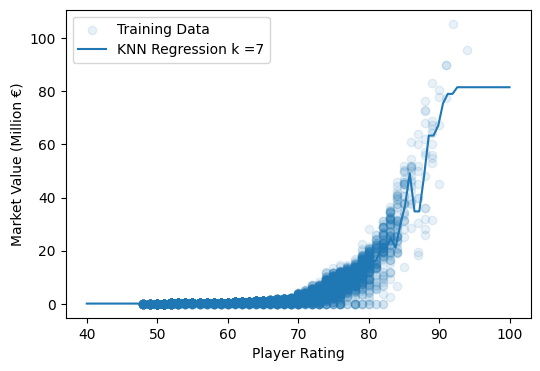

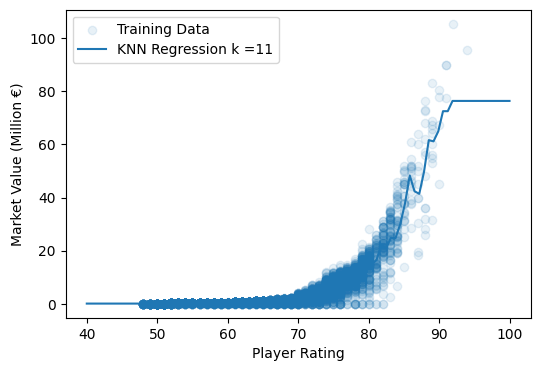

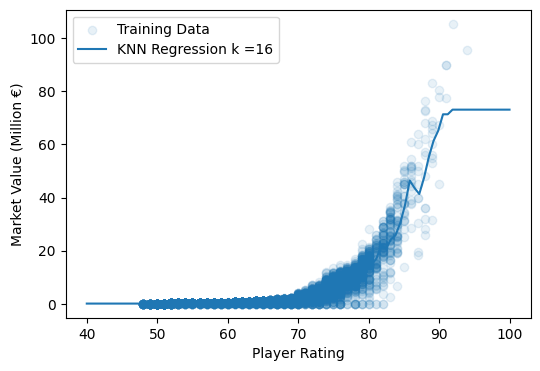

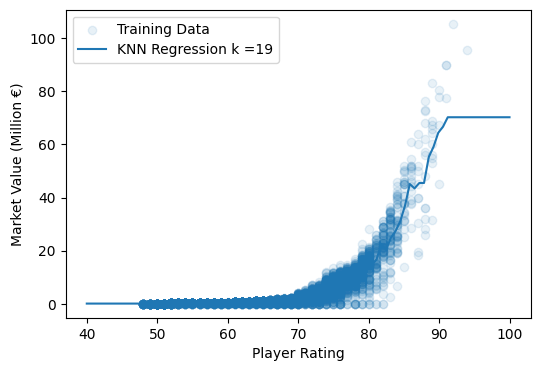

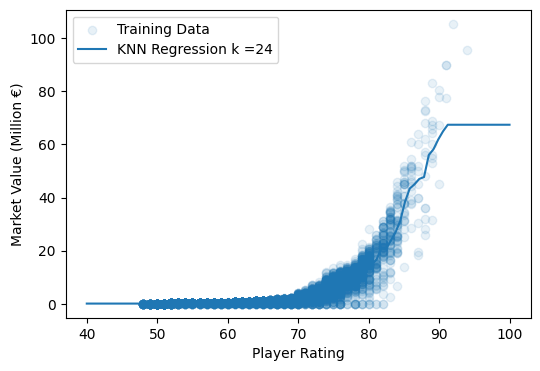

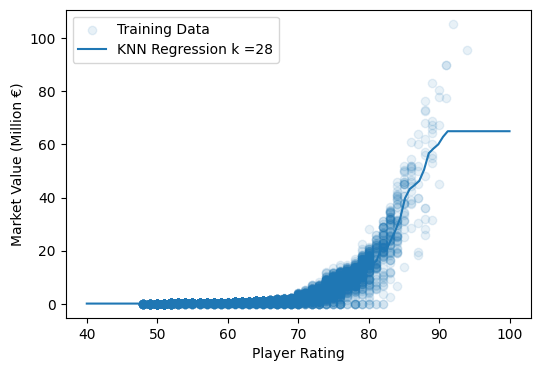

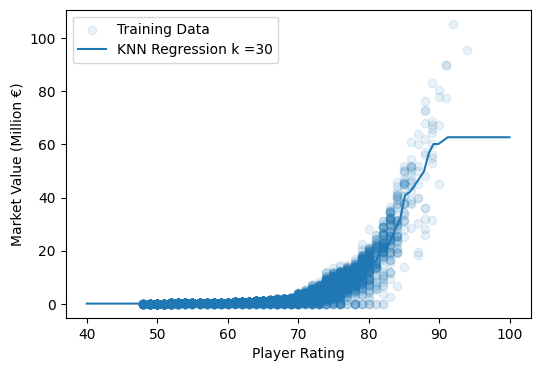

In [96]:
import random

MSE = {}

for i in range(6,31,4):
    i += random.randint(0,3)
    knn = KNeighborsRegressor(i)
    knn.fit(x_train, y_train)
    plt.figure(figsize=(6,4))
    plt.scatter(x_train[:, 0], y_train, alpha=0.1, label='Training Data')
    x_lin = np.linspace(40, 100, 90).reshape(-1, 1)
    plt.plot(x_lin, knn.predict(x_lin), label=f'KNN Regression k ={i}')
    plt.xlabel('Player Rating')
    plt.ylabel('Market Value (Million €)')
    plt.legend()
    plt.show()
    MSE[i] = mean_squared_error(y_train, knn.predict(x_train))

In [97]:
best_k = 0
best_v = float('inf')

for k, v in MSE.items():
    print(f'K({k}) MSE:{v:.2f}')
    if v < best_v:
        best_k = k
        best_v = v

print(f'The best performing model is k = {best_k}, with an MSE of {best_v}')

K(7) MSE:3.52
K(11) MSE:3.29
K(16) MSE:3.25
K(19) MSE:3.33
K(24) MSE:3.31
K(28) MSE:3.34
K(30) MSE:3.35
The best performing model is k = 16, with an MSE of 3.2545489874258395


## Bi-Variate Linear regression: Age, Rating

MSE linear: 18.144514809162185
MSE tree: 1.2853273958702287
MSE knn: 1.4658600647371327


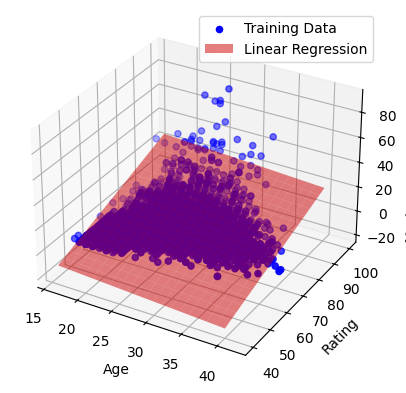

In [72]:
# Extract features and target
x = data[:, :2]  # Features: Age and Rating
y = data[:, 2] / 1000000  # Target: Market Value (scaled for visualization)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Initialize regression models
linear = LinearRegression()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor(7)

# Train models
linear.fit(x_train, y_train)
tree.fit(x_train, y_train)
knn.fit(x_train, y_train)

# Evaluate models
print('MSE linear:', mean_squared_error(y_test, linear.predict(x_test)))
print('MSE tree:', mean_squared_error(y_test, tree.predict(x_test)))
print('MSE knn:', mean_squared_error(y_test, knn.predict(x_test)))

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot training data
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c='b', marker='o', label='Training Data')

# Plot model predictions
x_surf, y_surf = np.meshgrid(np.linspace(16, 40, 20), np.linspace(40, 100, 20))
z_surf_linear = linear.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf_linear, color='r', alpha=0.5, label='Linear Regression')
ax.set_xlabel('Age')
ax.set_ylabel('Rating')
ax.set_zlabel('Market Value (Million €)')

plt.legend()
plt.show()

## Multivariate Regression: Rating, Age, Wages, Contract, Position

In [76]:
# Load data using pandas
data = pd.read_csv('players_20.csv')

# Extract relevant features and target
features = ['age', 'overall', 'wage_eur', 'contract_valid_until', 'player_positions']
target = 'value_eur'
data = data[features + [target]]

# One-hot encode player positions
data = pd.get_dummies(data, columns=['player_positions'])

# Drop rows with missing values
data.dropna(inplace=True)

# Extract features and target
x = data.drop(columns=[target]).values
y = data[target].values / 1000000  # Scale target for visualization

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Initialize regression models
linear = LinearRegression()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor(30)

# Train models
linear.fit(x_train, y_train)
tree.fit(x_train, y_train)
knn.fit(x_train, y_train)

# Evaluate models
print('MSE linear:', mean_squared_error(y_test, linear.predict(x_test)))
print('MSE tree:', mean_squared_error(y_test, tree.predict(x_test)))
print('MSE knn:', mean_squared_error(y_test, knn.predict(x_test)))

MSE linear: 7.0494817517056925
MSE tree: 1.228344745737394
MSE knn: 6.849101929805596


# Excluding Overall Rating

In [78]:
# Load data using pandas
data = pd.read_csv('players_20.csv')

# Extract relevant features and target
features = ['age', 'wage_eur', 'contract_valid_until', 'player_positions']
target = 'value_eur'
data = data[features + [target]]

# One-hot encode player positions
data = pd.get_dummies(data, columns=['player_positions'])

# Drop rows with missing values
data.dropna(inplace=True)

# Extract features and target
x = data.drop(columns=[target]).values
y = data[target].values / 1000000  # Scale target for visualization

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Initialize regression models
linear = LinearRegression()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor(30)

# Train models
linear.fit(x_train, y_train)
tree.fit(x_train, y_train)
knn.fit(x_train, y_train)

# Evaluate models
print('MSE linear:', mean_squared_error(y_test, linear.predict(x_test)))
print('MSE tree:', mean_squared_error(y_test, tree.predict(x_test)))
print('MSE knn:', mean_squared_error(y_test, knn.predict(x_test)))

MSE linear: 8.623735220062676
MSE tree: 12.964518050049175
MSE knn: 8.15592991501891
